# Dataset - 1 (Predicting solar radiations per meter square from the given weather conditions)

We will be using four different models to train this dataset and find the errors and graphical analysis using all four.

# Model 1 - Linear Regression 

RMSE: 281.8978581730807
Mean squared error: 79466.40
R-squared: 0.23


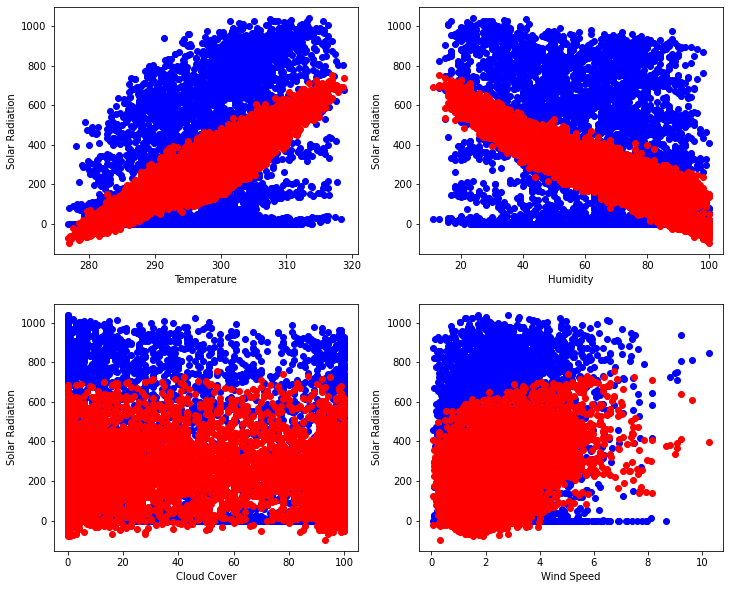

Output on given input: [-2.4199398]


In [2]:
#PLOT-DATASET1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from the CSV file
data = pd.read_csv('Weather_data.csv')

# Clean the data by removing any missing values
data = data.dropna()

# Create new features that could impact the price of an electric vehicle
#data['daily_solar_irradiance'] = data['solar_radiation'] * 24

# Split the data into training and testing sets
X = data[['temp', 'humidity', 'cloud_cover', 'wind_speed']]
y = data['solar_radiation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance using mean squared error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print("Mean squared error: %.2f" % mse)
print('R-squared: %.2f' % r2)

y_pred_test = model.predict(X_test)
# create scatter plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(X_test['temp'], y_test, color='blue')
axs[0, 0].scatter(X_test['temp'], y_pred_test, color='red')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Solar Radiation')

axs[0, 1].scatter(X_test['humidity'], y_test, color='blue')
axs[0, 1].scatter(X_test['humidity'], y_pred_test, color='red')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Solar Radiation')

axs[1, 0].scatter(X_test['cloud_cover'], y_test, color='blue')
axs[1, 0].scatter(X_test['cloud_cover'], y_pred_test, color='red')
axs[1, 0].set_xlabel('Cloud Cover')
axs[1, 0].set_ylabel('Solar Radiation')

axs[1, 1].scatter(X_test['wind_speed'], y_test, color='blue')
axs[1, 1].scatter(X_test['wind_speed'], y_pred_test, color='red')
axs[1, 1].set_xlabel('Wind Speed')
axs[1, 1].set_ylabel('Solar Radiation')

plt.show()

# Make a prediction using the trained model
new_X = np.array([[279.46,91,30.0,3.07]])
prediction = model.predict(new_X)


# Print the prediction
print("Output on given input:", prediction)

# Model 2 - Decision Tree

RMSE: 358.96239972543367
R-squared score: -0.25


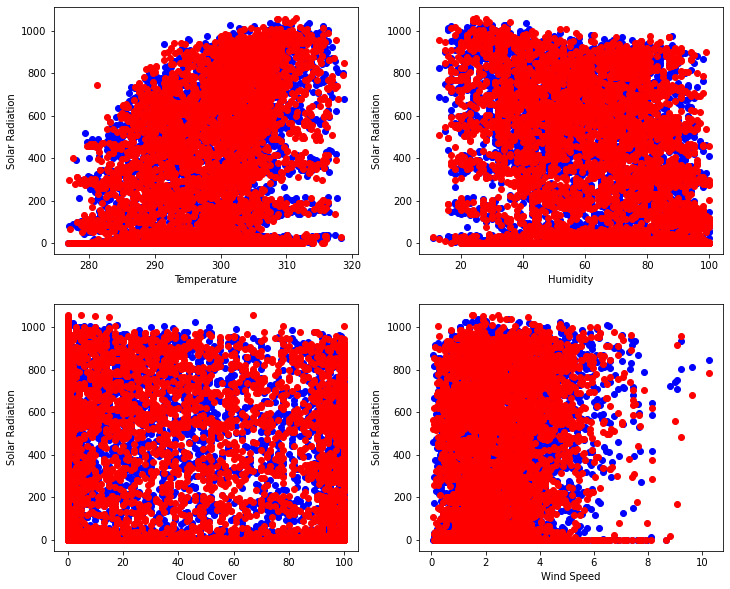

Output on given input: [60.42]


In [5]:
#DATASET-1: DECISION TREE
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# # Load data into Pandas DataFrame
# df = pd.read_csv('Weather_data.csv')

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

# load data
data = pd.read_csv('Weather_data.csv')

# split data into features and labels
X = data[['temp', 'humidity', 'cloud_cover', 'wind_speed']]
y = data['solar_radiation']

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create decision tree regressor model
model = DecisionTreeRegressor(random_state=42)

# Train model on training data
model.fit(X_train, y_train)

# Predict on testing data
y_pred = model.predict(X_test)

# Evaluate performance of model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print("R-squared score: {:.2f}".format(r2))

y_pred_test = model.predict(X_test)
# create scatter plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(X_test['temp'], y_test, color='blue')
axs[0, 0].scatter(X_test['temp'], y_pred_test, color='red')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Solar Radiation')

axs[0, 1].scatter(X_test['humidity'], y_test, color='blue')
axs[0, 1].scatter(X_test['humidity'], y_pred_test, color='red')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Solar Radiation')

axs[1, 0].scatter(X_test['cloud_cover'], y_test, color='blue')
axs[1, 0].scatter(X_test['cloud_cover'], y_pred_test, color='red')
axs[1, 0].set_xlabel('Cloud Cover')
axs[1, 0].set_ylabel('Solar Radiation')

axs[1, 1].scatter(X_test['wind_speed'], y_test, color='blue')
axs[1, 1].scatter(X_test['wind_speed'], y_pred_test, color='red')
axs[1, 1].set_xlabel('Wind Speed')
axs[1, 1].set_ylabel('Solar Radiation')

plt.show()

# Make a prediction using the trained model
new_X = np.array([[279.46,91,30.0,3.07]])
prediction = model.predict(new_X)


# Print the prediction
print("Output on given input:", prediction)

# Model 3 - SVM 

This model takes a lot of time to run.

RMSE: 297.5857330318756
R-squared score: 0.13886715654597637


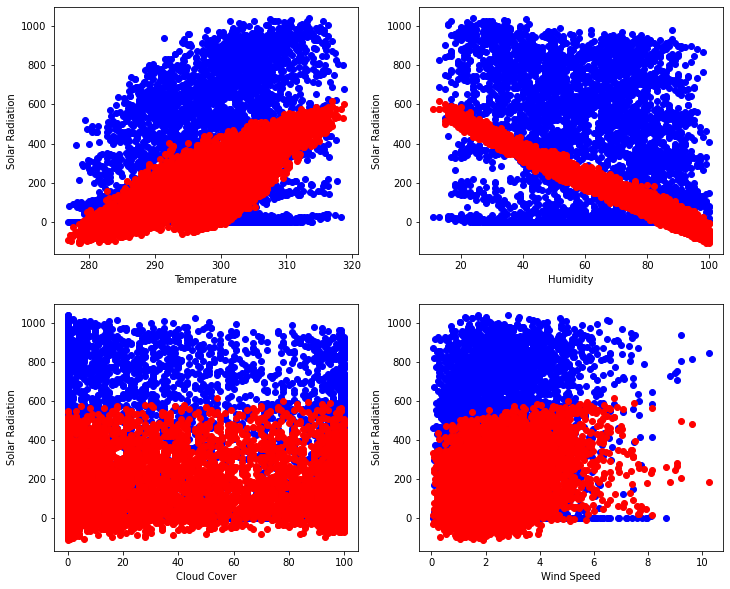

Output on given input: [60.42]


In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('Weather_data.csv')

# Split the dataset into features and target variable
X = data[['temp', 'humidity', 'cloud_cover', 'wind_speed']]
y = data['solar_radiation']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model
svm_model = SVR(kernel='linear')

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Test the SVM model on the test data
y_pred = svm_model.predict(X_test)

# Calculate the RMSE and R-squared score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output the RMSE and R-squared score
print("RMSE:", rmse)
print("R-squared score:", r2)

import matplotlib.pyplot as plt

# get predicted values for test set
y_pred_test= svm_model.predict(X_test)

# create scatter plots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(X_test['temp'], y_test, color='blue')
axs[0, 0].scatter(X_test['temp'], y_pred_test, color='red')
axs[0, 0].set_xlabel('Temperature')
axs[0, 0].set_ylabel('Solar Radiation')

axs[0, 1].scatter(X_test['humidity'], y_test, color='blue')
axs[0, 1].scatter(X_test['humidity'], y_pred_test, color='red')
axs[0, 1].set_xlabel('Humidity')
axs[0, 1].set_ylabel('Solar Radiation')

axs[1, 0].scatter(X_test['cloud_cover'], y_test, color='blue')
axs[1, 0].scatter(X_test['cloud_cover'], y_pred_test, color='red')
axs[1, 0].set_xlabel('Cloud Cover')
axs[1, 0].set_ylabel('Solar Radiation')

axs[1, 1].scatter(X_test['wind_speed'], y_test, color='blue')
axs[1, 1].scatter(X_test['wind_speed'], y_pred_test, color='red')
axs[1, 1].set_xlabel('Wind Speed')
axs[1, 1].set_ylabel('Solar Radiation')

plt.show()

# Make a prediction using the trained model
new_X = np.array([[279.46,91,30.0,3.07]])
prediction = model.predict(new_X)


# Print the prediction
print("Output on given input:", prediction)

# Model 4 - Neural Networks 

Epoch 1/10
745/745 [==============================] - 2s 2ms/step - loss: 101901.5859 - mse: 101901.5859 - mae: 232.2505 - val_loss: 76834.1094 - val_mse: 76834.1094 - val_mae: 225.5299
Epoch 2/10
745/745 [==============================] - 1s 2ms/step - loss: 78819.4531 - mse: 78819.4531 - mae: 228.7948 - val_loss: 75601.4375 - val_mse: 75601.4375 - val_mae: 223.9608
Epoch 3/10
745/745 [==============================] - 1s 2ms/step - loss: 77754.1953 - mse: 77754.1953 - mae: 226.5620 - val_loss: 74760.7266 - val_mse: 74760.7266 - val_mae: 220.7872
Epoch 4/10
745/745 [==============================] - 2s 2ms/step - loss: 76841.9844 - mse: 76841.9844 - mae: 224.0071 - val_loss: 73884.2578 - val_mse: 73884.2578 - val_mae: 219.7473
Epoch 5/10
745/745 [==============================] - 2s 2ms/step - loss: 76585.1094 - mse: 76585.1094 - mae: 223.0320 - val_loss: 73080.6641 - val_mse: 73080.6641 - val_mae: 217.8923
Epoch 6/10
745/745 [==============================] - 2s 2ms/step - loss: 7540

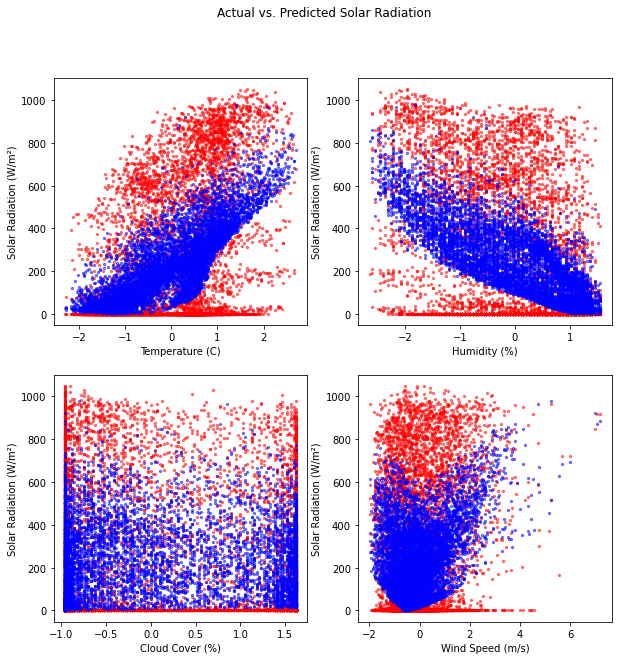

1/1 [==============================] - 0s 34ms/step
Output on given input: [[38518.934]]


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = pd.read_csv('Weather_data.csv')

# Clean the data
data = data.dropna()

# Create new features
#data['daily_solar_irradiance'] = data['solar_radiation'] * 24

# Define input and output variables
X = data[['temp', 'humidity', 'cloud_cover', 'wind_speed']]
y = data['solar_radiation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardize the input variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse, _, mae = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


# Plot a scatter plot of actual vs predicted
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Actual vs. Predicted Solar Radiation')

axs[0, 0].scatter(X_test[:, 0], y_test, s=5, c='red', alpha=0.5)
axs[0, 0].scatter(X_test[:, 0], y_pred, s=5, c='blue', alpha=0.5)
axs[0, 0].set_xlabel('Temperature (C)')
axs[0, 0].set_ylabel('Solar Radiation (W/m²)')

axs[0, 1].scatter(X_test[:, 1], y_test, s=5, c='red', alpha=0.5)
axs[0, 1].scatter(X_test[:, 1], y_pred, s=5, c='blue', alpha=0.5)
axs[0, 1].set_xlabel('Humidity (%)')
axs[0, 1].set_ylabel('Solar Radiation (W/m²)')

axs[1, 0].scatter(X_test[:, 2], y_test, s=5, c='red', alpha=0.5)
axs[1, 0].scatter(X_test[:, 2], y_pred, s=5, c='blue', alpha=0.5)
axs[1, 0].set_xlabel('Cloud Cover (%)')
axs[1, 0].set_ylabel('Solar Radiation (W/m²)')

axs[1, 1].scatter(X_test[:, 3], y_test, s=5, c='red', alpha=0.5)
axs[1, 1].scatter(X_test[:, 3], y_pred, s=5, c='blue', alpha=0.5)
axs[1, 1].set_xlabel('Wind Speed (m/s)')
axs[1, 1].set_ylabel('Solar Radiation (W/m²)')

plt.show()

# Make a prediction using the trained model
new_X = np.array([[279.46,91,30.0,3.07]])
prediction = model.predict(new_X)


# Print the prediction
print("Output on given input:", prediction)